# Title: Optimization of Stock Portfolio - Comparative Analysis

### Course: WQD7011 Numerical Optimization

### Lecturer: Dr. Lim Chee Kau

### Group Name: Optimisers

### Group members:
1. Soo Kar Lok (S2000961)
2. Hong Zi Shen (S2114600)
3. Jonathan Kiew Weng Kiat (S2043163)
4. Tay Shi Hui (17170153)


### Load Stock Data

In [ ]:
%pip install numdifftools

import matplotlib.pyplot as plt
import numdifftools as nd
import numpy as np
import pandas as pd
from datetime import datetime
from scipy import optimize


DIR = '.'
START_DATE = '2020-01-01'
END_DATE = '2021-12-31'
TOTAL_DAYS = datetime.strptime(END_DATE, "%Y-%m-%d") - datetime.strptime(START_DATE, "%Y-%m-%d")
STOCK_DF = [
    'DIALOG',
    'DIGI',
    'GENM',
    'GENTING',
    'HLFG',
    'IHH',
    'IOICORP',
    'KLK',
    'MAXIS',
    'MAYBANK',
    'MISC',
    'NESTLE',
    'PBBANK',
    'PCHEM',
    'PETDAG',
    'PETGAS',
    'SIME',
    'TENAGA',
    'TM',
    'TOPGLOV',
]


def get_stock_data(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df = df.loc[(df['Date'] > START_DATE) & (df['Date'] <= END_DATE)]
    df = df['Adj Close'].to_numpy()
    return df


def get_data():
    data = pd.DataFrame()
    for stock in STOCK_DF:
        data[stock] = get_stock_data(DIR + '/' + stock + '.csv')
    return data


data = get_data()
data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,DIALOG,DIGI,GENM,GENTING,HLFG,IHH,IOICORP,KLK,MAXIS,MAYBANK,MISC,NESTLE,PBBANK,PCHEM,PETDAG,PETGAS,SIME,TENAGA,TM,TOPGLOV
0,3.390816,4.081936,2.879872,5.521271,16.315191,5.433884,4.386980,23.230511,4.987787,7.296941,7.548100,140.495804,17.943718,6.715700,21.553104,15.298168,2.125605,11.548713,3.554340,1.371064
1,3.400560,4.191274,2.888572,5.557594,16.696388,5.482662,4.471889,23.137959,5.108087,7.296941,7.628973,140.591370,18.077200,6.770152,21.703300,15.478573,2.125605,11.513979,3.572804,1.376961
2,3.390816,4.091046,2.853770,5.484947,16.848866,5.414373,4.453021,23.119448,4.932265,7.213548,7.611000,140.017929,17.905581,6.761075,21.684526,15.226007,2.116116,11.375047,3.535876,1.374013
3,3.429791,4.127493,2.862471,5.466785,16.620148,5.463151,4.453021,23.082428,5.043310,7.213548,7.575057,140.973648,18.382301,6.869980,21.665752,15.298168,2.144584,11.340315,3.572804,1.371064
4,3.381073,4.054601,2.818969,5.448623,16.200832,5.414373,4.405849,22.675198,5.089580,7.121816,7.431284,139.731186,17.886511,6.779226,21.684526,15.298168,2.116116,11.270848,3.609732,1.359270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,2.514843,3.927704,2.792136,4.576115,17.128178,6.596064,3.708375,20.969774,4.367954,8.022408,6.837756,131.984573,16.448494,8.643351,19.701130,17.214310,2.222176,9.226091,5.303154,2.360000
488,2.554604,3.937524,2.840610,4.615143,17.465580,6.695104,3.767551,20.989172,4.328603,8.022408,6.818275,132.381516,16.546988,8.672650,20.075451,17.234005,2.202511,9.167265,5.283402,2.370000
489,2.554604,3.908066,2.840610,4.595629,17.386192,6.685200,3.698513,20.950377,4.348278,8.051405,6.837756,132.877701,16.566687,8.682417,20.036051,17.096134,2.241841,9.177069,5.392033,2.410000
490,2.594364,3.966981,2.840610,4.585872,17.148026,6.714912,3.737963,21.144360,4.417142,8.022408,6.818275,132.183044,16.606085,8.584751,20.193659,16.958260,2.251674,9.137850,5.421659,2.440000


### Exploratory Data Analysis

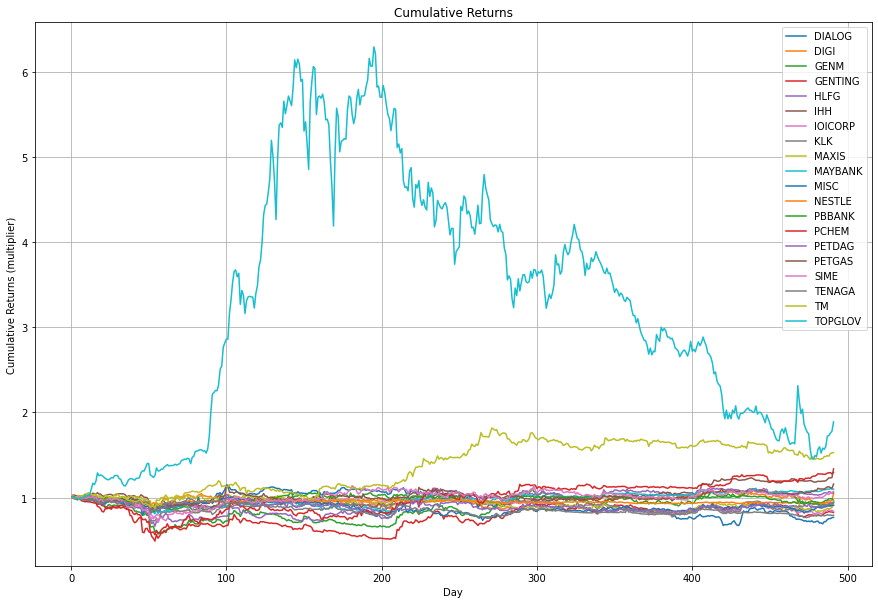

In [ ]:
# Plot cumulative returns
((data.pct_change() + 1).cumprod()).plot(figsize=(15, 10))

plt.legend()
plt.title('Cumulative Returns')
plt.ylabel('Cumulative Returns (multiplier)')
plt.xlabel('Day')
plt.grid()
plt.show()

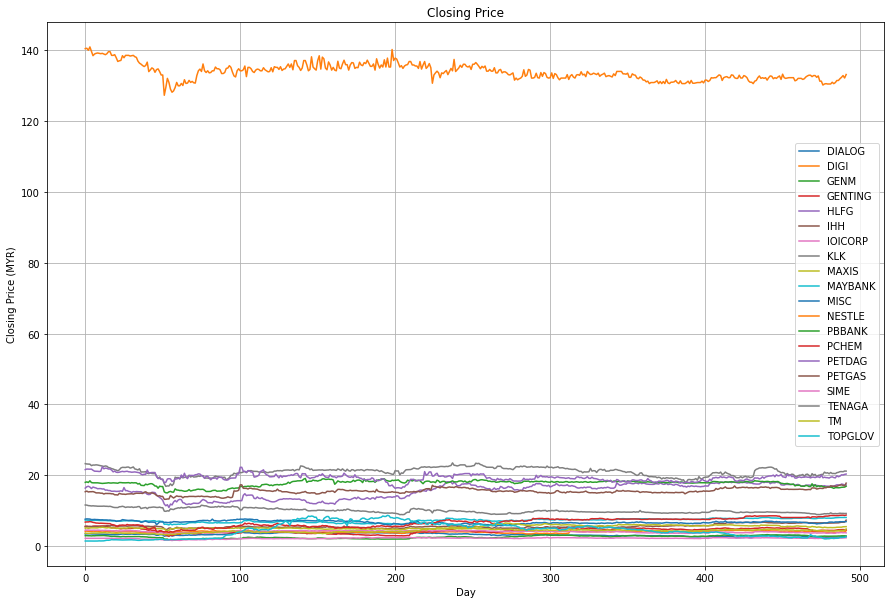

In [ ]:
# Plot closing prices
data.plot(figsize=(15, 10))

plt.legend()
plt.title('Closing Price')
plt.ylabel('Closing Price (MYR)')
plt.xlabel('Day')
plt.grid()
plt.show()

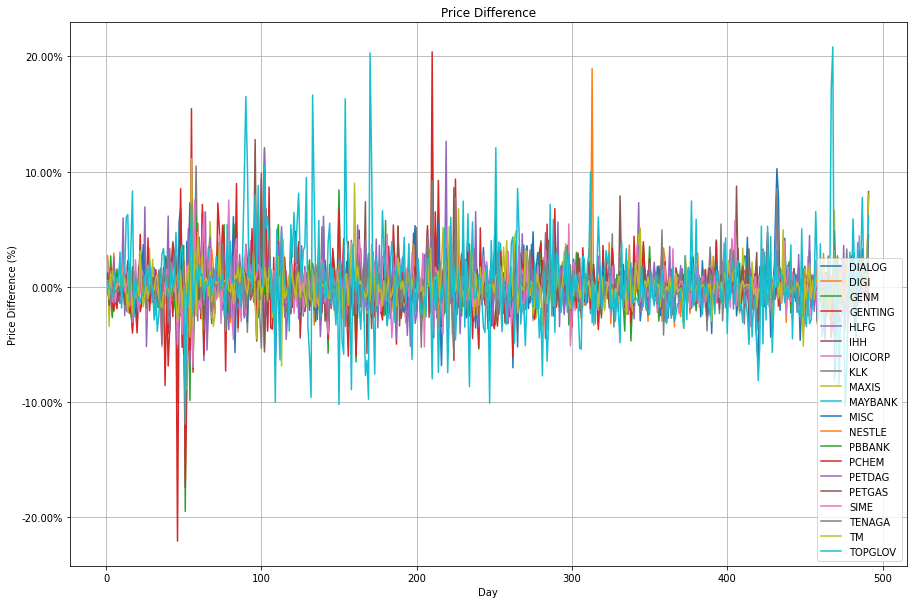

In [ ]:
# Plot price difference
datadiff = data / data.shift(1) - 1

ax = datadiff.plot(figsize=(15, 10))
ax.set_yticklabels(['{:,.2%}'.format(x) for x in ax.get_yticks()])

plt.legend()
plt.title('Price Difference')
plt.ylabel('Price Difference (%)')
plt.xlabel('Day')
plt.grid()
plt.show()

### Calculate risk and return for each stock

Daily Risk Free Rate formula:<br>
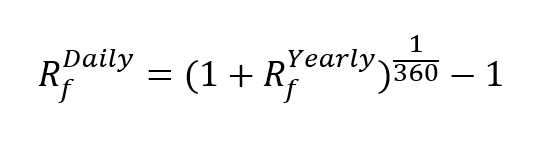

Risk: [0.019 0.017 0.022 0.025 0.019 0.017 0.014 0.015 0.016 0.013 0.016 0.008
 0.013 0.024 0.02  0.014 0.018 0.014 0.016 0.04 ]
Return: [-0.     0.     0.    -0.     0.     0.001 -0.    -0.    -0.     0.
 -0.    -0.    -0.     0.001 -0.     0.     0.    -0.     0.001  0.002]


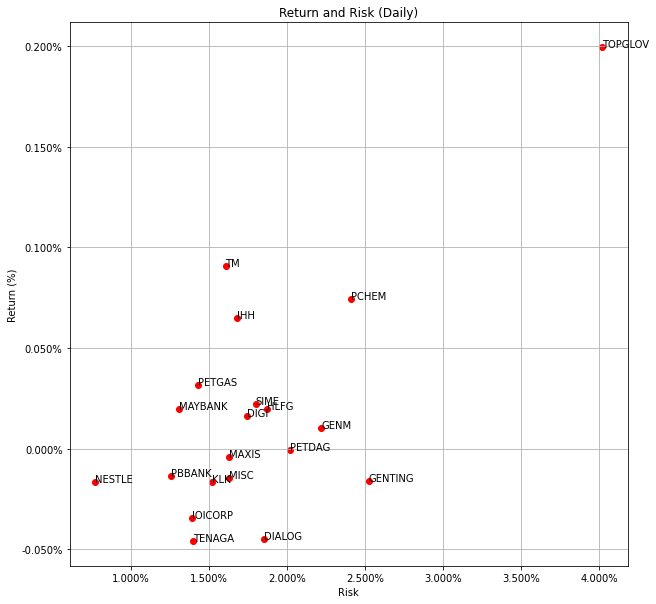

In [ ]:
TOTAL_TRADING_DAYS = len(data.index)

# Average Malaysia Bond yield rate, we use this as the baseline for the risk free rate
# http://www.worldgovernmentbonds.com/bond-historical-data/malaysia/10-years/
# We use data from 2020-2021
ANNUAL_RISK_FREE_RATE = (0.02685 + 0.03611) / 2
DAILY_RISK_FREE_RATE = (1 + ANNUAL_RISK_FREE_RATE) ** (1 / 365) - 1


def get_risk(prices):
    return (prices / prices.shift(1) - 1).std().values


def get_return(prices):
    return ((prices / prices.shift(1) - 1) - DAILY_RISK_FREE_RATE).mean().values


portfolio_risk = get_risk(data)
portfolio_return = get_return(data)
print('Risk: ' + str(portfolio_risk))
print('Return: ' + str(portfolio_return))

# Plot return vs risk
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.scatter(x=portfolio_risk, y=portfolio_return, color='red')
ax.set(title='Return and Risk (Daily)', xlabel='Risk', ylabel='Return (%)')
ax.set_yticklabels(['{:,.3%}'.format(x) for x in ax.get_yticks()])
ax.set_xticklabels(['{:,.3%}'.format(x) for x in ax.get_xticks()])

for i, name in enumerate(STOCK_DF):
    ax.annotate(name, (portfolio_risk[i], portfolio_return[i]))

plt.grid()
plt.show()

### Calculate average historical returns and variance-covariance to generate Sharpe Ratio

In [ ]:
daily_returns = data / data.shift(1) - 1
daily_returns = daily_returns.iloc[1:, :]
mean_return = np.mean(daily_returns, axis=0)
print(mean_return)
covar_return = np.cov(daily_returns, rowvar=False)
print(covar_return)

DIALOG    -0.000365
DIGI       0.000245
GENM       0.000186
GENTING   -0.000078
HLFG       0.000282
IHH        0.000733
IOICORP   -0.000262
KLK       -0.000079
MAXIS      0.000041
MAYBANK    0.000279
MISC      -0.000060
NESTLE    -0.000079
PBBANK    -0.000050
PCHEM      0.000827
PETDAG     0.000078
PETGAS     0.000399
SIME       0.000305
TENAGA    -0.000375
TM         0.000992
TOPGLOV    0.002082
dtype: float64
[[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.   ]
 [ 0.     0.     0.     0.001  0.     0.     0.     0.     0.     0.
   0.     0.     0.     0.     0.     0.     0.     0.     0.    -0.   ]
 [ 0.     0.     

### Objective function
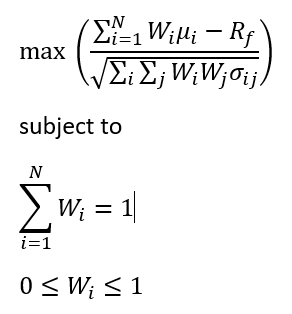
<br>
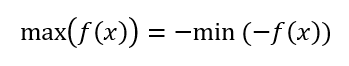
<br>We want to find the maximum of the objective function with 4 algorithms:
- Algorithm 1: Newton Conjugate Gradient (Newton-CG)
- Algorithm 2: Trust-Region Newton Conjugate Gradient (trust-ncg)
- Algorithm 3: Sequential Least Squares Quadratic Programming (SLSQP)
- Algorithm 4: Trust Region Constraints (trust-constr)

### Algorithm 1: Newton Conjugate Gradient (Newton-CG)

In [ ]:
def max_sharpe_ratio_newton_cg(mean_return, covar_return, risk_free_rate, portfolio_size):

    def f(self, mean_return, covar_return, risk_free_rate, portfolio_size):
        func_denom = np.sqrt(np.matmul(np.matmul(self, covar_return), self.T))
        func_numer = np.matmul(np.array(mean_return), self.T) - risk_free_rate
        func = -(func_numer / func_denom)
        return func

    xinit = np.repeat(0.33, portfolio_size)
    g = nd.Gradient(f)
    h = nd.Hessian(f)
    opt = optimize.minimize(
        f,
        xinit, 
        args=(mean_return, covar_return, risk_free_rate, portfolio_size),
        method='newton-cg',
        jac=g,
        hess=h,
        tol=10**-3
    )
    return opt

result = max_sharpe_ratio_newton_cg(mean_return, covar_return, DAILY_RISK_FREE_RATE, len(data.columns))
print(result)

def standardize(x):
    x[x < 0] = 0
    total = np.sum(x)
    return x / total
    
x_optimal = []
x_optimal.append(result.x)
x_optimal_array = np.array(x_optimal)
x_optimal_array = standardize(x_optimal_array)
risk = np.matmul((np.matmul(x_optimal_array, covar_return)), x_optimal_array.T)
expect_return = np.matmul(np.array(mean_return), x_optimal_array.T)
annual_risk = np.sqrt(risk * TOTAL_TRADING_DAYS) / 2
annual_return = TOTAL_TRADING_DAYS * np.array(expect_return) / 2
max_sharpe_ratio = (annual_return - ANNUAL_RISK_FREE_RATE * 100) / annual_risk 
np.set_printoptions(precision=3, suppress=True)

# Display results
print('Daily risk free rate: {0:.6f}%'.format(DAILY_RISK_FREE_RATE * 100))
print('Annual risk free rate: {0:.6f}%'.format(ANNUAL_RISK_FREE_RATE * 100))
print('Maximal Sharpe Ratio: {0:.3f}'.format(max_sharpe_ratio[0][0]))
print('Annualized Risk: {0:.3f}%'.format(annual_risk[0][0]))
print('Annualized Expected Portfolio Return: {0:.3f}%'.format(annual_return[0]))
print('Optimal weights (%):\n', x_optimal_array.T * 100 )

     fun: -0.13013082253511613
     jac: array([ 0., -0., -0., -0., -0., -0.,  0., -0., -0.,  0.,  0., -0., -0.,
       -0., -0., -0.,  0.,  0., -0., -0.])
 message: 'Optimization terminated successfully.'
    nfev: 17
    nhev: 13
     nit: 13
    njev: 29
  status: 0
 success: True
       x: array([-17.261,   5.287,  17.577, -18.916,   0.705,  22.244, -14.257,
        -1.388,  -6.86 ,  22.286,  -7.349, -26.538,   0.461,  14.711,
        -0.216,  11.132,   5.375, -32.067,  29.222,   8.565])
Daily risk free rate: 0.008492%
Annual risk free rate: 3.148000%
Maximal Sharpe Ratio: -25.965
Annualized Risk: 0.115%
Annualized Expected Portfolio Return: 0.165%
Optimal weights (%):
 [[ 0.   ]
 [ 3.843]
 [12.777]
 [ 0.   ]
 [ 0.513]
 [16.17 ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [16.201]
 [ 0.   ]
 [ 0.   ]
 [ 0.335]
 [10.694]
 [ 0.   ]
 [ 8.092]
 [ 3.907]
 [ 0.   ]
 [21.242]
 [ 6.226]]


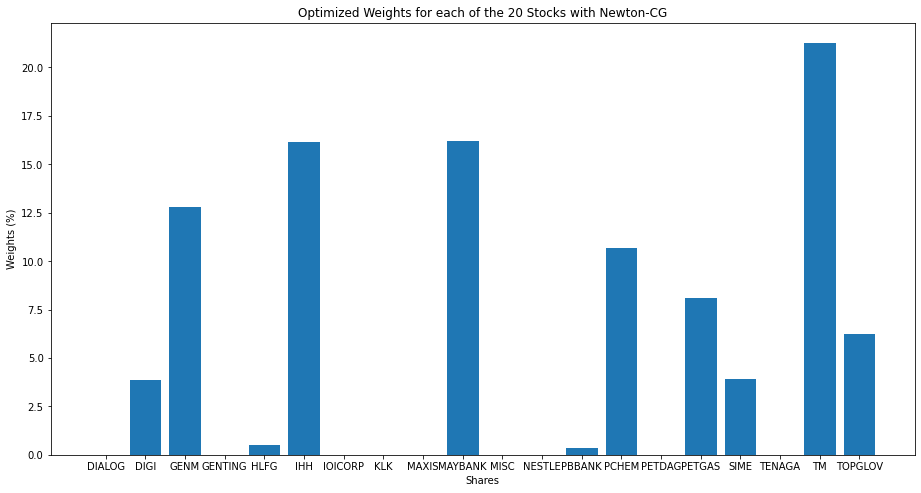

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(data.columns, x_optimal_array[0] * 100)
ax.set_xlabel('Shares')
ax.set_ylabel('Weights (%)')
ax.set_title('Optimized Weights for each of the 20 Stocks with Newton-CG')
plt.show()

### Algorithm 2: Trust-Region Newton Conjugate Gradient (trust-ncg)

In [ ]:
def max_sharpe_ratio_trust_ncg(mean_return, covar_return, risk_free_rate, portfolio_size):

    def f(self, mean_return, covar_return, risk_free_rate, portfolio_size):
        func_denom = np.sqrt(np.matmul(np.matmul(self, covar_return), self.T))
        func_numer = np.matmul(np.array(mean_return), self.T) - risk_free_rate
        func = -(func_numer / func_denom)
        return func

    xinit = np.repeat(0.33, portfolio_size)
    g = nd.Gradient(f)
    h = nd.Hessian(f)
    opt = optimize.minimize(
        f,
        xinit, 
        args=(mean_return, covar_return, risk_free_rate, portfolio_size),
        method='trust-ncg',
        jac=g,
        hess=h,
        tol=10**-3
    )
    return opt

result = max_sharpe_ratio_trust_ncg(mean_return, covar_return, DAILY_RISK_FREE_RATE, len(data.columns))
print(result)

def standardize(x):
    x[x < 0] = 0
    total = np.sum(x)
    return x / total
    
x_optimal = []
x_optimal.append(result.x)
x_optimal_array = np.array(x_optimal)
x_optimal_array = standardize(x_optimal_array)
risk = np.matmul((np.matmul(x_optimal_array, covar_return)), x_optimal_array.T)
expect_return = np.matmul(np.array(mean_return), x_optimal_array.T)
annual_risk = np.sqrt(risk * TOTAL_TRADING_DAYS) / 2
annual_return = TOTAL_TRADING_DAYS * np.array(expect_return) / 2
max_sharpe_ratio = (annual_return - ANNUAL_RISK_FREE_RATE * 100) / annual_risk 
np.set_printoptions(precision=3, suppress=True)

# Display results
print('Daily risk free rate: {0:.6f}%'.format(DAILY_RISK_FREE_RATE * 100))
print('Annual risk free rate: {0:.6f}%'.format(ANNUAL_RISK_FREE_RATE * 100))
print('Maximal Sharpe Ratio: {0:.3f}'.format(max_sharpe_ratio[0][0]))
print('Annualized Risk: {0:.3f}%'.format(annual_risk[0][0]))
print('Annualized Expected Portfolio Return: {0:.3f}%'.format(annual_return[0]))
print('Optimal weights (%):\n', x_optimal_array.T * 100 )

     fun: -0.12830596187899007
    hess: array([[ 0.022,  0.004,  0.01 ,  0.01 ,  0.006,  0.005,  0.007,  0.007,
         0.003,  0.006,  0.007,  0.002,  0.005,  0.012,  0.008,  0.006,
         0.007,  0.004,  0.005,  0.007],
       [ 0.004,  0.02 ,  0.004,  0.006,  0.004,  0.004,  0.005,  0.004,
         0.009,  0.004,  0.005,  0.003,  0.004,  0.007,  0.005,  0.004,
         0.003,  0.005,  0.003,  0.   ],
       [ 0.01 ,  0.004,  0.032,  0.03 ,  0.012,  0.004,  0.005,  0.006,
         0.003,  0.011,  0.006,  0.003,  0.004,  0.012,  0.006,  0.002,
         0.008,  0.01 ,  0.005, -0.004],
       [ 0.01 ,  0.006,  0.03 ,  0.041,  0.014,  0.007,  0.007,  0.008,
         0.006,  0.014,  0.008,  0.002,  0.005,  0.016,  0.006,  0.004,
         0.009,  0.011,  0.008, -0.001],
       [ 0.006,  0.004,  0.012,  0.014,  0.022,  0.003,  0.005,  0.005,
         0.006,  0.007,  0.003,  0.002,  0.004,  0.01 ,  0.005,  0.003,
         0.004,  0.007,  0.004, -0.003],
       [ 0.005,  0.004,  0.004,  0

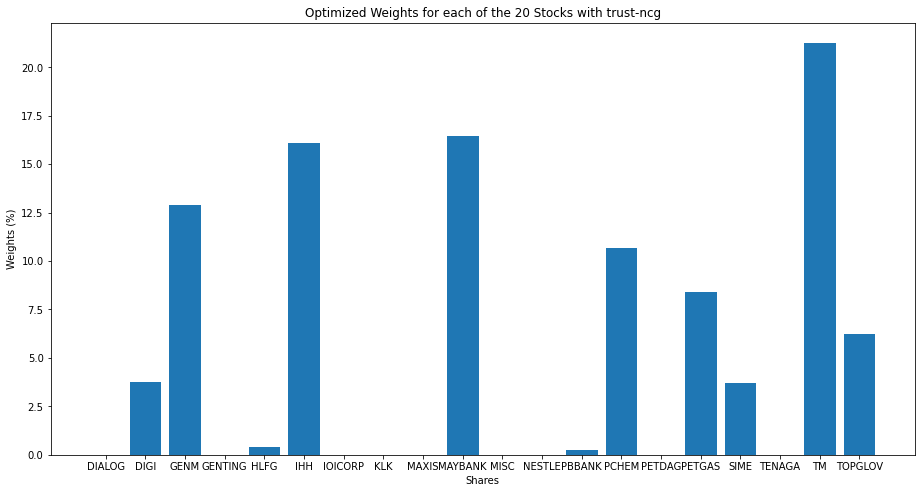

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(data.columns, x_optimal_array[0] * 100)
ax.set_xlabel('Shares')
ax.set_ylabel('Weights (%)')
ax.set_title('Optimized Weights for each of the 20 Stocks with trust-ncg')
plt.show()

### Algorithm 3: Sequential Least Squares Quadratic Programming (SLSQP)

In [ ]:
def max_sharpe_ratio_slsqp(mean_return, covar_return, risk_free_rate, portfolio_size):

    def f(self, mean_return, covar_return, risk_free_rate, portfolio_size):
        func_denom = np.sqrt(np.matmul(np.matmul(self, covar_return), self.T))
        func_numer = np.matmul(np.array(mean_return), self.T) - risk_free_rate
        func = -(func_numer / func_denom)
        return func

    def constraint(x):
        A = np.ones(x.shape)
        b = 1
        return np.matmul(A, x.T) - b

    xinit = np.repeat(0.33, portfolio_size)

    cons = ({'type': 'eq', 'fun': constraint})
    lb = 0
    ub = 1
    bnds = tuple([(lb, ub) for x in xinit])

    opt = optimize.minimize(
        f,
        xinit, 
        args=(mean_return, covar_return, risk_free_rate, portfolio_size),
        method='slsqp',
        bounds=bnds,
        constraints=cons, 
        tol=10**-3
    )
    return opt

result = max_sharpe_ratio_slsqp(mean_return, covar_return, DAILY_RISK_FREE_RATE, len(data.columns))
print(result)
    
x_optimal = []
x_optimal.append(result.x)
x_optimal_array = np.array(x_optimal)
risk = np.matmul((np.matmul(x_optimal_array, covar_return)), x_optimal_array.T)
expect_return = np.matmul(np.array(mean_return), x_optimal_array.T)
annual_risk = np.sqrt(risk * TOTAL_TRADING_DAYS) / 2
annual_return = TOTAL_TRADING_DAYS * np.array(expect_return) / 2
max_sharpe_ratio = (annual_return - ANNUAL_RISK_FREE_RATE * 100) / annual_risk 
np.set_printoptions(precision=3, suppress=True)

# Display results
print('Daily risk free rate: {0:.6f}%'.format(DAILY_RISK_FREE_RATE * 100))
print('Annual risk free rate: {0:.6f}%'.format(ANNUAL_RISK_FREE_RATE * 100))
print('Maximal Sharpe Ratio: {0:.3f}'.format(max_sharpe_ratio[0][0]))
print('Annualized Risk: {0:.3f}%'.format(annual_risk[0][0]))
print('Annualized Expected Portfolio Return: {0:.3f}%'.format(annual_return[0]))
print('Optimal weights (%):\n', x_optimal_array.T * 100 )

     fun: -0.07869511756403556
     jac: array([ 0.067,  0.012,  0.019,  0.056,  0.011, -0.009,  0.048,  0.034,
        0.028,  0.005,  0.032,  0.018,  0.025,  0.004,  0.024, -0.002,
        0.004,  0.057, -0.016,  0.003])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.   , 0.   , 0.   , 0.   , 0.   , 0.229, 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.127, 0.   , 0.085, 0.   , 0.   ,
       0.366, 0.192])
Daily risk free rate: 0.008492%
Annual risk free rate: 3.148000%
Maximal Sharpe Ratio: -20.761
Annualized Risk: 0.139%
Annualized Expected Portfolio Return: 0.263%
Optimal weights (%):
 [[ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [22.902]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [ 0.   ]
 [12.743]
 [ 0.   ]
 [ 8.507]
 [ 0.   ]
 [ 0.   ]
 [36.604]
 [19.244]]


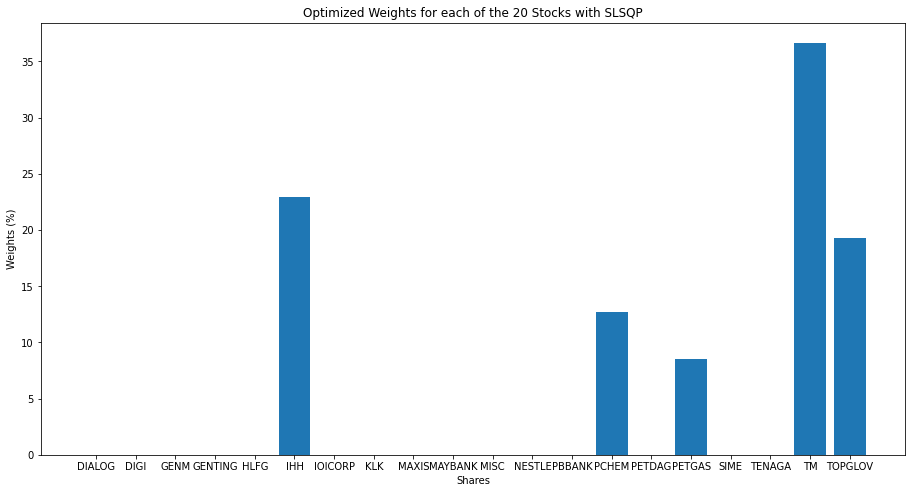

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(data.columns, x_optimal_array[0] * 100)
ax.set_xlabel('Shares')
ax.set_ylabel('Weights (%)')
ax.set_title('Optimized Weights for each of the 20 Stocks with SLSQP')
plt.show()

### Algorithm 4: Trust Region Constraint (trust-constr)

In [ ]:
def max_sharpe_ratio_trust_constr(mean_return, covar_return, risk_free_rate, portfolio_size):

    def f(self, mean_return, covar_return, risk_free_rate, portfolio_size):
        func_denom = np.sqrt(np.matmul(np.matmul(self, covar_return), self.T))
        func_numer = np.matmul(np.array(mean_return), self.T) - risk_free_rate
        func = -(func_numer / func_denom)
        return func

    def constraint(x):
        A = np.ones(x.shape)
        b = 1
        return np.matmul(A, x.T) - b

    xinit = np.repeat(0.33, portfolio_size)

    cons = ({'type': 'eq', 'fun': constraint})
    lb = 0
    ub = 1
    bnds = tuple([(lb, ub) for x in xinit])
    g = nd.Gradient(f)
    h = nd.Hessian(f)

    opt = optimize.minimize(
        f,
        xinit, 
        args=(mean_return, covar_return, risk_free_rate, portfolio_size),
        method='trust-constr',
        jac=g,
        # hess=h,
        bounds=bnds,
        constraints=cons, 
        tol=10**-3
    )
    return opt

result = max_sharpe_ratio_trust_constr(mean_return, covar_return, DAILY_RISK_FREE_RATE, len(data.columns))
print(result)
    
x_optimal = []
x_optimal.append(result.x)
x_optimal_array = np.array(x_optimal)
x_optimal_array = standardize(x_optimal_array)
risk = np.matmul((np.matmul(x_optimal_array, covar_return)), x_optimal_array.T)
expect_return = np.matmul(np.array(mean_return), x_optimal_array.T)
annual_risk = np.sqrt(risk * TOTAL_TRADING_DAYS) / 2
annual_return = TOTAL_TRADING_DAYS * np.array(expect_return) / 2
max_sharpe_ratio = (annual_return - ANNUAL_RISK_FREE_RATE * 100) / annual_risk 
np.set_printoptions(precision=3, suppress=True)

# Display results
print('Daily risk free rate: {0:.6f}%'.format(DAILY_RISK_FREE_RATE * 100))
print('Annual risk free rate: {0:.6f}%'.format(ANNUAL_RISK_FREE_RATE * 100))
print('Maximal Sharpe Ratio: {0:.3f}'.format(max_sharpe_ratio[0][0]))
print('Annualized Risk: {0:.3f}%'.format(annual_risk[0][0]))
print('Annualized Expected Portfolio Return: {0:.3f}%'.format(annual_return[0]))
print('Optimal weights (%):\n', x_optimal_array.T * 100 )

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)
/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning

 barrier_parameter: 0.004000000000000001
 barrier_tolerance: 0.004000000000000001
          cg_niter: 12
      cg_stop_cond: 4
            constr: [array([-0.]), array([0.026, 0.048, 0.041, 0.029, 0.047, 0.072, 0.031, 0.037, 0.041,
       0.05 , 0.038, 0.042, 0.039, 0.066, 0.041, 0.058, 0.051, 0.028,
       0.082, 0.133])]
       constr_nfev: [168, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 5.995204332975845e-15
    execution_time: 0.2335045337677002
               fun: -0.04302933973143978
              grad: array([ 0.077,  0.009,  0.029,  0.067,  0.011, -0.042,  0.056,  0.039,
        0.027,  0.004,  0.035,  0.02 ,  0.03 , -0.025,  0.027, -0.015,
        0.003,  0.066, -0.069, -0.108])
               jac: [array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]]), array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0.,

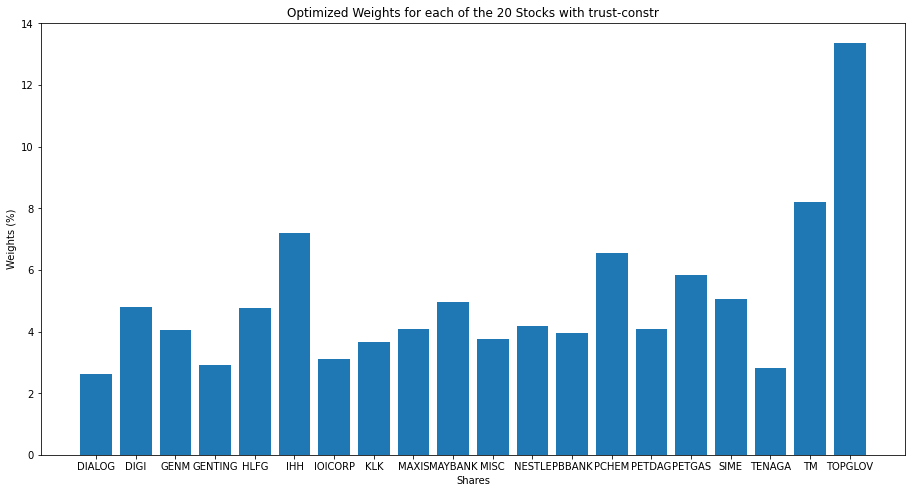

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 6)
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(data.columns, x_optimal_array[0] * 100)
ax.set_xlabel('Shares')
ax.set_ylabel('Weights (%)')
ax.set_title('Optimized Weights for each of the 20 Stocks with trust-constr')
plt.show()